In [1]:
#梯度下降法

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

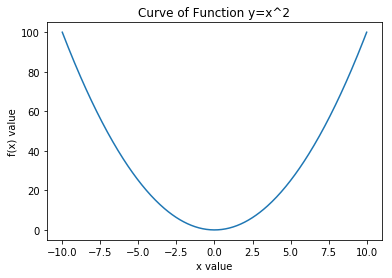

In [3]:
x_plot = np.linspace(-10, 10, 400)
y_plot = torch.tensor(x_plot)**2

# 绘制曲线
plt.plot(x_plot, y_plot)

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.title('Curve of Function y=x^2')
plt.show()

In [4]:
#使用梯度下降算法找到一元二次函数的最小值点

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(5.0, requires_grad=True)
y0 = x0**2

alpha = 0.1
epsilon = 0.0001

x_values = []
y_values = []

# 循环直到y的变化小于epsilon
while True:
    # 计算梯度
    y0.backward()
    y = y0.item()  # 保存y0在当前迭代的取值，用于判断迭代的停止条件
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y0 = x0**2
    # 检查是否满足结束条件
    if abs(y0.item() - y) < epsilon:
        break

y0.backward()
print("x0: ", x0, "y0: ", y0, "x0.grad: ", x0.grad)

x0:  tensor(0.0121, requires_grad=True) y0:  tensor(0.0001, grad_fn=<PowBackward0>) x0.grad:  tensor(0.0242)


In [6]:
#观察梯度下降法在一元二次函数求最小值的过程

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(5.0, requires_grad=True)
y0 = x0**2

alpha = 0.1

x_values = []
y_values = []

for _iter in range(8):
    x_values.append(x0.item())
    y_values.append(y0.item())
    # 计算梯度
    y0.backward()
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y0 = x0**2

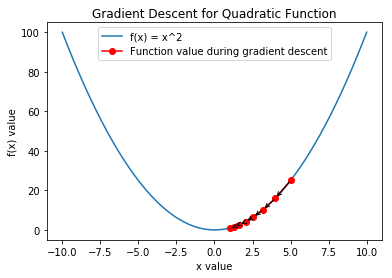

In [8]:
x_plot = np.linspace(-10, 10, 400)
y_plot = torch.tensor(x_plot)**2

# 绘制曲线
plt.plot(x_plot, y_plot, label='f(x) = x^2')
plt.plot(x_values, y_values, 'o-', label='Function value during gradient descent', color="red")

for i in range(1, len(x_values)):
    plt.annotate('', xy=(x_values[i], y_values[i]), xytext=(x_values[i-1], y_values[i-1]),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.title('Gradient Descent for Quadratic Function')
plt.legend()
plt.show()

In [9]:
#观察梯度下降法对sin(x)求最小值的过程

In [10]:
def target_func(x):
    return torch.sin(x)

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt

x0 = torch.tensor(0.0, requires_grad=True)

alpha = 0.1
epsilon = 0.0001

x_values = []
y_values = []

# 循环直到y的变化小于epsilon
for _iter in range(5):
    # 计算梯度
    x_values.append(x0.item())
    y0 = target_func(x0)
    y0.backward()
    # 更新x0
    with torch.no_grad():
        x0 -= alpha * x0.grad  # x0 = x0-alpha * x0.grad 创建一个新的张量并赋值给x
    x0.grad.zero_()
    # 计算新的y0
    y_values.append(y0.item())

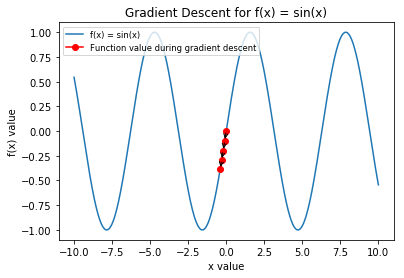

In [12]:
x_plot = torch.from_numpy(np.linspace(-10, 10, 500))
y_plot = target_func(x_plot)

# 绘制曲线
plt.plot(x_plot, y_plot, label='f(x) = sin(x)')
plt.plot(x_values, y_values, 'o-', label='Function value during gradient descent', color="red")

for i in range(1, len(x_values)):
    plt.annotate('', xy=(x_values[i], y_values[i]), xytext=(x_values[i-1], y_values[i-1]),
                 arrowprops=dict(arrowstyle='->', connectionstyle='arc3'))

plt.xlabel('x value')
plt.ylabel('f(x) value')
plt.title('Gradient Descent for f(x) = sin(x)')
plt.legend(loc='upper left', fontsize='small')
plt.show()

In [13]:
#二元函数梯度下降法实战
#y=f(x,y)=(4−2.1x2+x43)x2+xy+(−4+4y2)y2

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# 定义函数
def f(x, y):
    return ((4 - 2.1*x**2 + x**4 / 3.) * x**2 + x * y  + (-4 + 4*y**2) * y **2)

In [16]:
learning_rate = 0.1
num_iterations = 20
x0 = -1.0
y0 = -0.5
# 记录函数值
loss_values = []

x_values = [x0]
y_values = [y0]
# 执行梯度下降并记录函数值
x = torch.tensor(x0, requires_grad=True)
y = torch.tensor(y0, requires_grad=True)
for i in range(num_iterations):
    loss = f(x, y)
    loss_values.append(loss.item())
    loss.backward()
    with torch.no_grad():
        x -= learning_rate * x.grad
        y -= learning_rate * y.grad
        x.grad.zero_()
        y.grad.zero_()
    x_values.append(x.item())
    y_values.append(y.item())

In [17]:
#绘制函数值的变化图

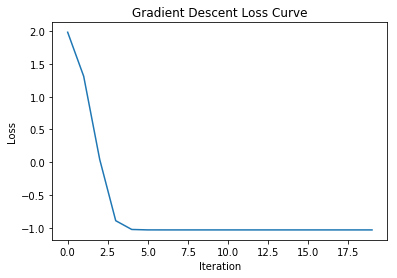

In [18]:
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Gradient Descent Loss Curve')
plt.show()

In [19]:
#绘制迭代过程

NameError: name 'X' is not defined

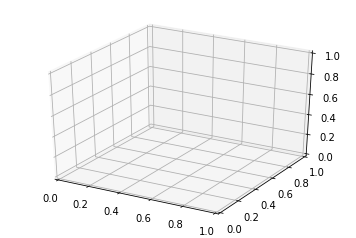

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis',alpha=0.5)
ax.scatter(x_values, y_values, [f(x_val, y_val) for x_val, y_val in zip(x_values, y_values)], color='r')

for i in range(1, len(x_values)):
    x1, y1 = x_values[i-1], y_values[i-1]
    x2, y2 = x_values[i], y_values[i]
    u = x2 - x1
    v = y2 - y1
    w = f(x2, y2) - f(x1, y1)
    z1 = f(x1, y1)
    z2 = f(x2, y2)
    length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2 + (z2 - z1)**2)
    ax.quiver(x1, y1, f(x1, y1), u, v, w, length=length, normalize=True)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [22]:
##作业

In [23]:
import torch
def sin(x):
    return torch.sin(x)

In [24]:
x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(5.0, requires_grad=True)

In [25]:
v_minus_1 = x1
v0 = x2
v1 = torch.log(v_minus_1)
v2 = v_minus_1*v0
v3 = sin(v0)
v4 = v1 + v2
v5 = v4 - v3

In [26]:
node_dict = {"v_minus_1": v_minus_1, "v0": v0, "v1": v1, "v2": v2, "v3": v3, "v4": v4, "v5": v5}
var_dict = {"x1": x1, "x2": x2}
for k in node_dict:
    for var_name in var_dict:
        if var_dict[var_name].grad is not None:
            var_dict[var_name].grad.zero_()
        node_dict[k].backward(retain_graph=True)
        print(f"节点{k}对{var_name}的导数", var_dict[var_name].grad)

节点v_minus_1对x1的导数 tensor(1.)
节点v_minus_1对x2的导数 None
节点v0对x1的导数 tensor(0.)
节点v0对x2的导数 tensor(1.)
节点v1对x1的导数 tensor(0.5000)
节点v1对x2的导数 tensor(0.)
节点v2对x1的导数 tensor(5.)
节点v2对x2的导数 tensor(2.)
节点v3对x1的导数 tensor(0.)
节点v3对x2的导数 tensor(0.2837)
节点v4对x1的导数 tensor(5.5000)
节点v4对x2的导数 tensor(2.)
节点v5对x1的导数 tensor(5.5000)
节点v5对x2的导数 tensor(1.7163)


In [27]:
#####222

In [ ]:
#作业提示: 计算如下二元函数在“计算图”中的所有节点分别对x1=1、x2=0的偏导数


In [28]:
import torch

In [29]:
def x_square(x):
    return x**2

In [30]:
x1 = torch.tensor(1.0, requires_grad=True)
x2 = torch.tensor(0.0, requires_grad=True)

In [31]:
v0 = x1
v1 = x2
v2 = x_square(v0)
z = v2+v1

In [32]:
node_dict = {"v0": v0, "v1": v1, "v2": v2, "z": z}
var_dict = {"x1": x1, "x2": x2}

In [33]:
for node_name in node_dict:
    for var_name in var_dict:
        node = node_dict[node_name]
        var = var_dict[var_name]
        
        if var.grad is not None:
            var.grad.zero_()
        else:
            var.grad = torch.tensor(0.0)
        node.backward(retain_graph=True)
        print(f"节点{node_name}对{var_name}导数: ", var.grad)

节点v0对x1导数:  tensor(1.)
节点v0对x2导数:  tensor(0.)
节点v1对x1导数:  tensor(0.)
节点v1对x2导数:  tensor(1.)
节点v2对x1导数:  tensor(2.)
节点v2对x2导数:  tensor(0.)
节点z对x1导数:  tensor(2.)
节点z对x2导数:  tensor(1.)
